In [1]:
import json, glob, os, numpy
from data_process_functions_lili_original import *
os.chdir("/Users/adamyedidia/breast_cancer/spreadsheets/")

import openpyxl, pprint


SHEET_NAME = 'manisha_new.xlsx'
#LIST_OF_BINARY_COLS = ['Q', 'R', 'S', 'T','U','V','W','X','Y','Z','AA','AB','AC']
LIST_OF_BINARY_COLS = ['D','F','G','H','I','J','K','L','M','T','U','W','X','Y','AA','AE','AH','AJ']
LIST_OF_REAL_COLS = ['A','C','N','O','P','Q','R','S','V','Z','U','V','Z']  
ANSWER_COL = 'AQ'
        
data,feature_names,result=dataprocess(SHEET_NAME,LIST_OF_BINARY_COLS,LIST_OF_REAL_COLS,ANSWER_COL)
yy=[1 if x=='M' else 0 for x in result]
print 'cancer numbers: %d' %yy.count(1)
y=np.array(yy)
X_structure=data[:,1:]
feature_names_structure=feature_names[1:]
n=X_structure.shape[0]


def readreport(SHEET_NAME):
    sheet = openpyxl.load_workbook(SHEET_NAME).active
    report=[]
    for j in range (1,sheet.max_column+1):
        if sheet.cell(row=1,column=j).value=='BXPATHREP':
            for i in range(2,sheet.max_row+1):
                rpt=sheet.cell(row=i,column=j).value
                #print rpt
                #rpt.replace('_x000D_\n_x000D_\n', '\n')
                rpt=rpt.replace('_x000D_\n_x000D_\n', '')
                rpt=rpt.replace('MASSACHUSETTS GENERAL HOSPITAL','')
                rpt=rpt.replace('BOSTON, MA  REMOVED_CASE_ID','')
                rpt=rpt.lower()
                rpt=rpt.replace('removed_patient_name','')
                rpt=rpt.replace('_patient_name_removed','')
                rpt=rpt.replace('removed_accession_id','')
                rpt=rpt.replace('removed_case_id','')
                rpt=rpt.replace('removed_date','')
                rpt=rpt.replace('removed_month','')
                rpt=rpt.replace('removed_patient_','')
                rpt=rpt.replace('\n\n','')  
                rpt=rpt.replace('\n \n','')
                rpt.strip('\n\n')
                rpt.strip('\n \n')
                report.append(rpt)
    return report

report= readreport(SHEET_NAME)
vectorizer = CountVectorizer(ngram_range=(1, 2),min_df=1)
#XXX = vectorizer.fit_transform(report)
ft_report= numpy.array(vectorizer.fit_transform(report).toarray())

feature_names_report = vectorizer.get_feature_names()
feature_names_report=np.array(feature_names_report,dtype=str)
print "total uni & bi gram features are :%s" %str(feature_names_report.shape)
count=numpy.sum(ft_report,axis=0)
delete=[]
thresh=20             #####################===============you can change this guy
for i in range(1,count.shape[0]):
    if count[i]<thresh:
        delete.append(i)
ft_report_p=numpy.delete(ft_report,delete,1)
feature_names_report_prune=numpy.delete(feature_names_report,delete,0)
print "total uni & bi gram features pruned with threshold of 20  are  :%s" %str(feature_names_report_prune.shape)
ft_report_prune=ft_report_p

Real-valued Features:
ID
AGE
WEIGHT
HEIGHT
BIRTH
AGEPREG
MAAGE
MPAGE
DENSITY
PRIORBX
ASSESS
DENSITY
PRIORBX

Binary Features:
RACE
LOC
SPROCS
FBC
PBC
POC
SMOKE
ALCOHOL
ASHKENAZI
HORMONE
ASSESS
FIRSTMAM
FROMSCREEN
CLINFIND
FINDTYPE
SIDE
BXTYPE
BXPATH_CONCAT

Result:
SXRESULT
data size is: 1119 X 157
test reasult is: SXRESULT
cancer numbers: 135
total uni & bi gram features are :(43867,)
total uni & bi gram features pruned with threshold of 20  are  :(2303,)


In [2]:
ft_report_prune.shape

(1118, 2303)

In [3]:
ft_report_prune.shape

(1118, 2303)

In [4]:
f_structure= ExtraTreesClassifier(n_estimators=200,max_depth=12,max_features=80,class_weight = {1:7},
                              random_state=123)
f_report = ExtraTreesClassifier(n_estimators=200,max_depth=10,max_features=500,class_weight = {1:5},
                              random_state=123)
'''
feature_ranking(f_structure,feature_names_structure,X_structure,y,'importantfeature_structure.txt',pp=1)
feature_ranking(f_report,feature_names_report_prune,ft_report_prune,y,'importantfeature_report.txt',pp=1)
'''

"\nfeature_ranking(f_structure,feature_names_structure,X_structure,y,'importantfeature_structure.txt',pp=1)\nfeature_ranking(f_report,feature_names_report_prune,ft_report_prune,y,'importantfeature_report.txt',pp=1)\n"

new sets


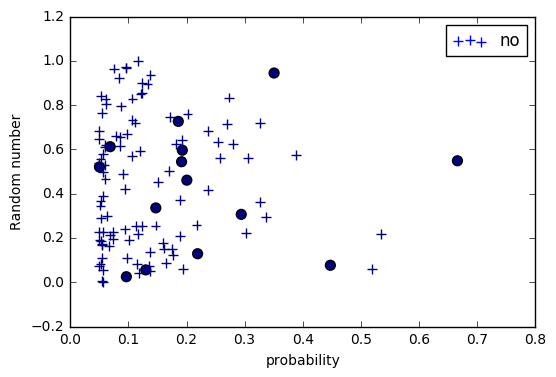

new sets


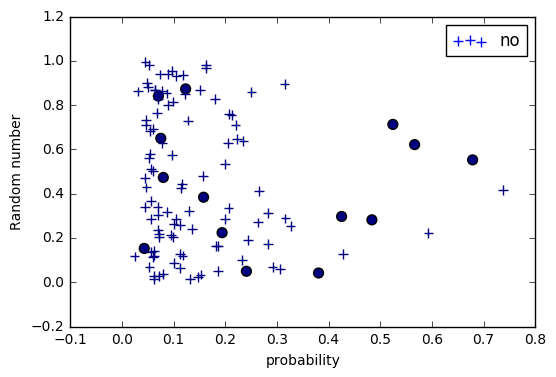

new sets


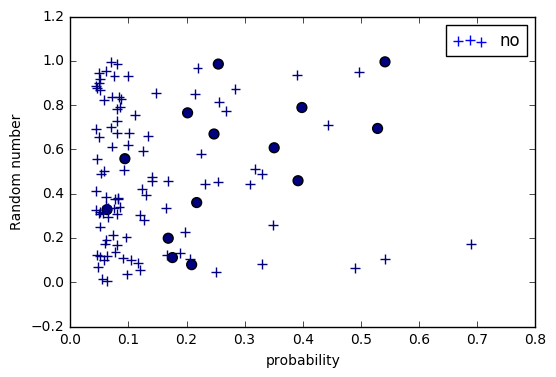

new sets


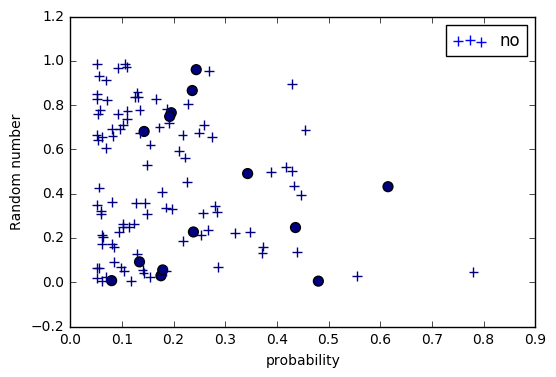

new sets


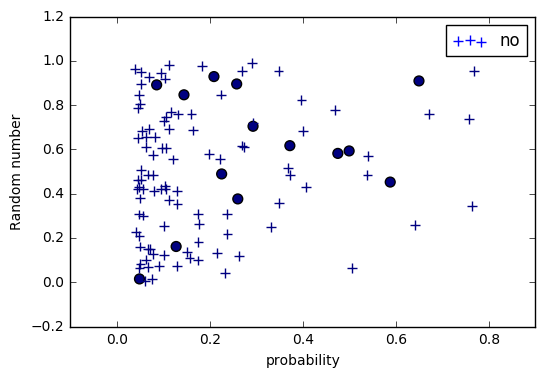

new sets


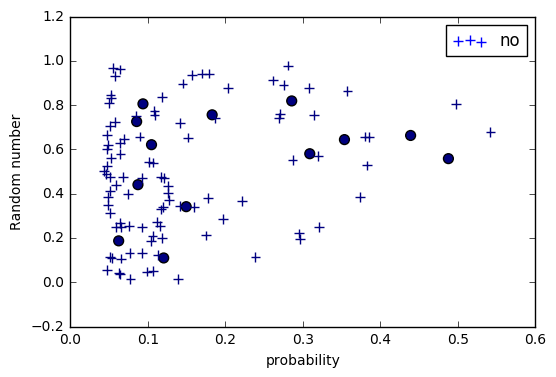

new sets


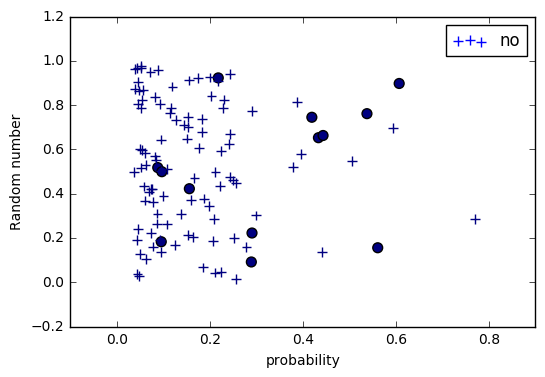

new sets


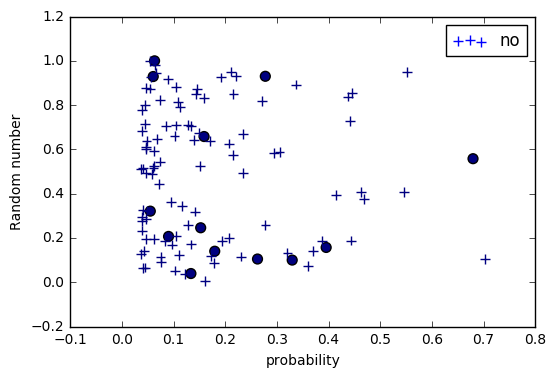

new sets


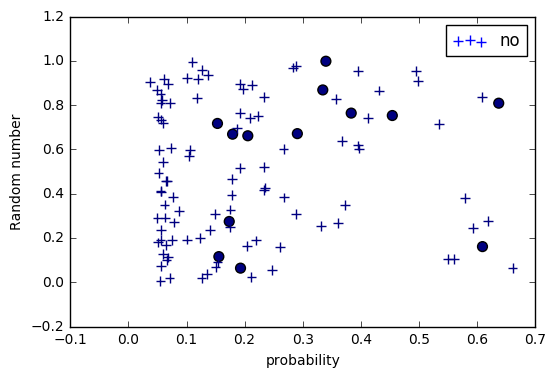

new sets


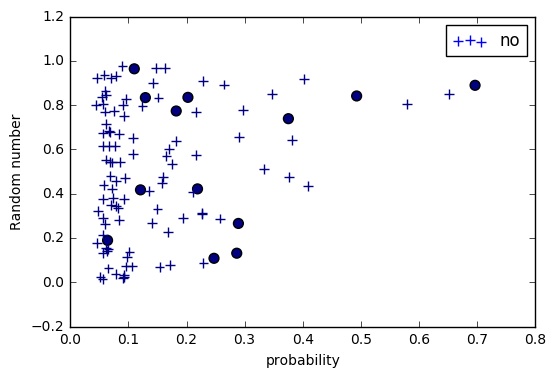

In [5]:
from sklearn.cross_validation import StratifiedShuffleSplit

n_str=100
n_report=180
weight =3
random_state= 127

#sss = StratifiedShuffleSplit(y, 10, test_size=0.05, random_state=1237)
#rs = cross_validation.ShuffleSplit(len(y), n_iter=10,test_size=.1, random_state=1237)

from sklearn.cross_validation import StratifiedKFold
skf = StratifiedKFold(y, 10, shuffle=True, random_state=random_state)

k=0

YTEST=[]
YTEST_index=[]
Probability=[]

for train_index, test_index in skf: 
        ff = ExtraTreesClassifier(n_estimators=200,max_depth=10,max_features=100
                                      ,class_weight = {1:weight},random_state=123)
        
        print 'new sets'
        X_train_struct, X_test_struct = X_structure[train_index], X_structure[test_index]
        X_train_txt, X_test_txt = ft_report_prune[train_index], ft_report_prune[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        YTEST.append(y_test)
        YTEST_index.append(test_index)
   
        #k+=1
        #feature_ranking(f_structure,feature_names_structure,X_train_struct,y_train,'importantfeature_strcture_'+str(k)+'.txt',pp=0)
        #feature_ranking(f_report,feature_names_report_prune,X_train_txt,y_train,'importantfeature_report_'+str(k)+'.txt',pp=0)

        indx_structure=get_sorted_ft_idx(f_structure,X_train_struct,y_train,n=n_str)
        indx_txt=get_sorted_ft_idx(f_report,X_train_txt,y_train,n=n_report)
        
        X_train=np.concatenate((X_train_struct[:,indx_structure], X_train_txt[:,indx_txt]), axis=1)
        X_test=np.concatenate((X_test_struct[:,indx_structure], X_test_txt[:,indx_txt]), axis=1)
        
       
        ff.fit(X_train, y_train)

        ff_proba=ff.predict_proba(X_test)
        Probability.append(ff_proba)
        indx1=np.where(y_test==1)
        indx2=np.where(y_test==0)
        yy= np.random.random_sample((len(y_test),))
        plt.clf()
        #plt.scatter([0, 1], [0, 1])
        plt.scatter(ff_proba[:,1][indx1], yy[indx1], c=y_test[indx1], s=50,marker='o')
        plt.scatter(ff_proba[:,1][indx2], yy[indx2], c=y_test[indx2], s=50,marker='+',label='no')
        plt.xlabel('probability')
        plt.ylabel('Random number')
        plt.legend(loc='best')
        plt.show()
        #prb=cus_probability(threshold, ff_proba[:,1])
        #prb=np.array(prb)

In [6]:
p_all=[]
f_all=[]
r_all=[]
roc_all=[]
patients=[]
for ii in range(len(YTEST)):
    y_test=YTEST[ii]
    ff_proba=Probability[ii]
    roc=[]
    p=[]
    r=[]
    f=[]
    #results=[]
    pat=[]
    Thresh=[]
    for i in range(30):
        threshold=float(float(i+1)/80)
        Thresh.append(threshold)
        predicted=cus_predict(threshold, ff_proba[:,1])
        #results.append(predicted)

        fpr_rf, tpr_rf, _ = roc_curve(y_test,predicted)
        roc.append([fpr_rf, tpr_rf])
        p.append(precision_score(y_test,predicted))
        r.append(recall_score(y_test,predicted))
        f.append(f1_score(y_test,predicted))
        print(classification_report(y_test,predicted) )
        print 'roc_auc is %f :' %roc_auc_score(y_test,predicted)
        pt=len(predicted)-np.count_nonzero(predicted)
        print 'non cancer patient : %d' %pt
        pat.append(pt)

    #plt.scatter(prb[:,1],y_test)

    '''
    indxFb=np.intersect1d(np.where(ff_proba[:,1]>0.7 ),np.where(y_test==0))
    indxFm=np.intersect1d(np.where(ff_proba[:,1]<0.3),np.where(y_test==1))
    fp= X_test[indxFm][:,0]  ### The first column is the patient ID
    fn=X_test[indxFb][:,0]
    falsepositive.extend(fp)
    falsenegative.extend(fn)
    '''
    p_all.append(p)
    r_all.append(r)
    f_all.append(f)
    roc_all.append(roc)
    patients.append(pat)

/Users/adamyedidia/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00        99
          1       0.12      1.00      0.22        14

avg / total       0.02      0.12      0.03       113

roc_auc is 0.500000 :
non cancer patient : 0
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        99
          1       0.12      1.00      0.22        14

avg / total       0.02      0.12      0.03       113

roc_auc is 0.500000 :
non cancer patient : 0
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        99
          1       0.12      1.00      0.22        14

avg / total       0.02      0.12      0.03       113

roc_auc is 0.500000 :
non cancer patient : 0
             precision    recall  f1-score   support

          0       1.00      0.04      0.08        99
          1       0.13      1.00      0.23        14

avg / total       0.89      0.16      0.10       113

roc_a

In [7]:
n=2
#m=f_all.shape[1]
m=10

f_all=np.array(f_all)
r_all=np.array(r_all)
patients=np.array(patients)
print 'trainging size: %d' %f_all[:-n,i].shape
for i in range(m):
    print average(f_all[:-n,i])
print "  \n test result"
for i in range(m):
    print average(f_all[-n:,i])
print " \n train result"
for i in range(m):
    print average(r_all[:-n,i])
print "  \ntest result"

for i in range(m):
    print average(r_all[-n:,i])

print "\n train result"
t=sum([len(l) for l in YTEST_index[:-n] ])
for i in range(m):
    print float(sum(patients[:-n,i])/float(sum([len(l) for l in YTEST_index[:-n] ])))

print ' \n test result'
for i in range(m):
    print float(sum(patients[-n:,i])/float(sum([len(l) for l in YTEST_index[-n:] ])))
    
patients[9,3]

trainging size: 8


NameError: name 'average' is not defined

In [1]:
#[54486, 86819,111803]
TestID=54486
newdata=[]
newtxt=[]
ID=[]
newy=[]
for i in range(data.shape[0]):
    if data[i,0] ==TestID:
        ID.append(data[i,0])
        newdata.append(data[i,1:])
        newtxt.append(ft_report_p[i,:])
        newy.append(y[i])
    '''
    else:
        if yy[i]==1:
            ID.append(data[i,0])
            newdata.append(data[i])
            newtxt.append(ft_report_p[i,:])
            newy.append(yy[i])
    '''
newdata=np.array(newdata)
newtxt=np.array(newtxt)
newy=np.array(newy)

NameError: name 'data' is not defined

In [ ]:
X_test_special=np.concatenate((newdata[:,indx_structure], newtxt[:,indx_txt]), axis=1)
ff_proba=ff.predict_proba(X_test_special)
Probability.append(ff_proba)
indx1=np.where(newy==1)
indx2=np.where(newy==0)
yy= np.random.random_sample((len(newy),))
plt.clf()
#plt.scatter([0, 1], [0, 1])
plt.scatter(ff_proba[:,1][indx1], yy[indx1], c=newy[indx1], s=50,marker='o',label='cancer')
plt.scatter(ff_proba[:,1][indx2], yy[indx2], c=newy[indx2], s=50,marker='+',label='no cancer')
plt.xlabel('probability')
plt.ylabel('Random number')
plt.legend(loc='best')
plt.show()
#prb=cus_probability(threshold, ff_proba[:,1])
#prb=np.array(prb)

In [52]:
print str(X_test.shape)
print len( indx_structure)
print len( indx_txt)

(66L, 280L)
100
180
